In [ ]:
!pip install -q plotly==5.15.0 geopandas folium pycountry


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from IPython.display import display,HTML

plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid")

In [ ]:
import pandas as pd

DATA_URL = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"

# Try again
try:
    df = pd.read_csv(DATA_URL, parse_dates=["date"], low_memory=False)
    print("Rows, Cols:", df.shape)
    display(df.head(3))
except Exception as e:
    print("Error loading dataset:", e)


Rows, Cols: (535365, 61)


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [ ]:
import pandas as pd,numpy as np
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',160)

print("DataFrame shape:",df.shape)
print("\n====COLUMNS====")
print(df.columns.tolist())

DataFrame shape: (535365, 61)

====COLUMNS====
['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'n

In [ ]:
print("\n=== dtypes ===")
display(df.dtypes)

print("\n=== First 5 rows ===")
display(df.head())

print("\n=== Last 3 rows ===")
display(df.tail(3))


=== dtypes ===


,0
country,object
date,datetime64[ns]
total_cases,float64
new_cases,float64
new_cases_smoothed,float64
total_cases_per_million,float64
new_cases_per_million,float64
new_cases_smoothed_per_million,float64
total_deaths,float64
new_deaths,float64



=== First 5 rows ===


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute,excess_mortality_cumulative_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,icu_patients,icu_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,stringency_index,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,code,continent,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN



=== Last 3 rows ===


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute,excess_mortality_cumulative_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,icu_patients,icu_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,stringency_index,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,code,continent,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
535362,Zimbabwe,2025-09-26,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,0.0,357.2082,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Africa,16069061.0,41.538223,17.683001,62.3601,2207.957031,49.219894,2.1,42.456093,1.7,NaN
535363,Zimbabwe,2025-09-27,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,0.0,357.2082,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Africa,16069061.0,41.538223,17.683001,62.3601,2207.957031,49.219894,2.1,42.456093,1.7,NaN
535364,Zimbabwe,2025-09-28,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,0.0,357.2082,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Africa,16069061.0,41.538223,17.683001,62.3601,2207.957031,49.219894,2.1,42.456093,1.7,NaN


In [ ]:
# Date range and number of locations
if 'date' in df.columns:
    print("\nDate column min / max:", df['date'].min(), "/", df['date'].max())
else:
    print("\nNo 'date' column found — ensure parse_dates was used on read_csv.")

if 'location' in df.columns:
    print("Unique locations:", df['location'].nunique())
    print("Sample locations:", df['location'].unique()[:15])
else:
    print("No 'location' column found.")


Date column min / max: 2020-01-01 00:00:00 / 2025-12-31 00:00:00
No 'location' column found.


In [ ]:
import pandas as pd
import numpy as np

# 1. Check for duplicates
dup_count = df.duplicated(subset=["country", "date"]).sum()
print(f"Duplicate rows (by country+date): {dup_count}")

# 2. Drop exact duplicates if any
df = df.drop_duplicates(subset=["country", "date"], keep="last")

# 3. Check for missing values (%)
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
print("\nTop 15 columns with missing values (%):")
print(missing_percent.head(15))

# 4. Ensure 'date' is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 5. Remove invalid dates if any
df = df.dropna(subset=["date"])

# 6. Handle continent column if missing
if "continent" not in df.columns:
    print("\n⚠️ No 'continent' column — grouping by country only.")
else:
    print("\nContinents in dataset:", df["continent"].dropna().unique())

# 7. Replace negative or impossible values in numeric columns with NaN
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df.loc[df[col] < 0, col] = np.nan

print("\n✅ Basic cleaning done.")
print("Shape after cleaning:", df.shape)


Duplicate rows (by country+date): 0

Top 15 columns with missing values (%):
human_development_index                    100.000000
weekly_icu_admissions                       97.946635
weekly_icu_admissions_per_million           97.946635
excess_mortality_cumulative_per_million     97.440438
excess_mortality                            97.434087
excess_mortality_cumulative                 97.434087
excess_mortality_cumulative_absolute        97.434087
weekly_hosp_admissions_per_million          95.424243
weekly_hosp_admissions                      95.424243
icu_patients                                92.693583
icu_patients_per_million                    92.693583
hosp_patients_per_million                   92.405929
hosp_patients                               92.405929
total_boosters                              89.019828
total_boosters_per_hundred                  89.019828
dtype: float64

Continents in dataset: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']

✅ Ba

In [ ]:
# Step 2: Select key columns for analysis
key_columns = [
    "country", "continent", "date",
    "total_cases", "new_cases", "total_deaths", "new_deaths",
    "total_tests", "new_tests",
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "stringency_index", "population"
]

# Keep only those columns that exist in your dataset
available_cols = [col for col in key_columns if col in df.columns]
data = df[available_cols].copy()

print("Columns kept for analysis:", available_cols)
print("Shape before handling missing values:", data.shape)

# Step 2A: Check % of missing values
missing_pct = data.isna().mean().sort_values(ascending=False) * 100
print("\nMissing values percentage:")
print(missing_pct)

# Step 2B: Handle missing values

# Forward-fill and backward-fill within each country for time-series continuity
data = data.sort_values(["country", "date"])
data = data.groupby("country").apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

# Fill any remaining NaNs in key metrics with 0 where appropriate
fill_zero_cols = ["new_cases", "new_deaths", "new_tests", "total_cases", "total_deaths", "total_tests"]
for col in fill_zero_cols:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Drop rows with missing population or country
data = data.dropna(subset=["country", "population"])

print("\n✅ Missing values handled successfully.")
print("Shape after cleaning:", data.shape)

# Step 2C: Final sanity check
print("\nRemaining missing values (%):")
print(data.isna().mean().sort_values(ascending=False).head(10))


Columns kept for analysis: ['country', 'continent', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'stringency_index', 'population']
Shape before handling missing values: (535365, 14)

Missing values percentage:
new_tests                  85.915590
people_fully_vaccinated    85.615234
people_vaccinated          85.241658
total_tests                85.171425
total_vaccinations         84.455091
stringency_index           62.126773
continent                   7.504413
population                  3.213322
new_cases                   3.189600
new_deaths                  3.022984
total_cases                 2.560870
total_deaths                2.560870
date                        0.000000
country                     0.000000
dtype: float64


/tmp/ipython-input-1886020736.py:26: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-1886020736.py:26: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




✅ Missing values handled successfully.
Shape after cleaning: (518162, 14)

Remaining missing values (%):
stringency_index           0.254940
people_fully_vaccinated    0.085126
people_vaccinated          0.076995
total_vaccinations         0.076995
continent                  0.048518
country                    0.000000
total_deaths               0.000000
new_cases                  0.000000
total_cases                0.000000
date                       0.000000
dtype: float64


In [ ]:
# Step 3: Feature Creation
import numpy as np

# --- 1️⃣ Case Fatality Rate (CFR): deaths per total cases ---
if "total_deaths" in data.columns and "total_cases" in data.columns:
    data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]
    data["case_fatality_rate"] = data["case_fatality_rate"].replace([np.inf, -np.inf], np.nan)

# --- 2️⃣ Daily Growth Rate (%): new cases relative to total cases ---
if "new_cases" in data.columns and "total_cases" in data.columns:
    data["daily_growth_rate"] = (data["new_cases"] / data["total_cases"]) * 100
    data["daily_growth_rate"] = data["daily_growth_rate"].replace([np.inf, -np.inf], np.nan)

# --- 3️⃣ Vaccination percentage ---
if "people_vaccinated" in data.columns:
    data["vaccinated_pct"] = (data["people_vaccinated"] / data["population"]) * 100

if "people_fully_vaccinated" in data.columns:
    data["fully_vaccinated_pct"] = (data["people_fully_vaccinated"] / data["population"]) * 100

# --- 4️⃣ Testing intensity ---
if "total_tests" in data.columns:
    data["tests_per_thousand"] = (data["total_tests"] / data["population"]) * 1000

# --- 5️⃣ 7-day rolling averages for smoother trends ---
data = data.sort_values(["country", "date"])
for col in ["new_cases", "new_deaths"]:
    if col in data.columns:
        data[f"{col}_7d_avg"] = (
            data.groupby("country")[col]
            .transform(lambda x: x.rolling(7, min_periods=1).mean())
        )

# --- 6️⃣ Extract month and year for later aggregation ---
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["year_month"] = data["date"].dt.to_period("M").astype(str)

print("✅ New features created successfully!")
print(data[["country", "date", "total_cases", "new_cases", "case_fatality_rate",
             "vaccinated_pct", "daily_growth_rate", "new_cases_7d_avg"]].head(10))


✅ New features created successfully!
       country       date  total_cases  new_cases  case_fatality_rate  \
0  Afghanistan 2020-01-01          0.0        0.0                 NaN   
1  Afghanistan 2020-01-02          0.0        0.0                 NaN   
2  Afghanistan 2020-01-03          0.0        0.0                 NaN   
3  Afghanistan 2020-01-04          0.0        0.0                 NaN   
4  Afghanistan 2020-01-05          0.0        0.0                 NaN   
5  Afghanistan 2020-01-06          0.0        0.0                 NaN   
6  Afghanistan 2020-01-07          0.0        0.0                 NaN   
7  Afghanistan 2020-01-08          0.0        0.0                 NaN   
8  Afghanistan 2020-01-09          0.0        0.0                 NaN   
9  Afghanistan 2020-01-10          0.0        0.0                 NaN   

   vaccinated_pct  daily_growth_rate  new_cases_7d_avg  
0             0.0                NaN               0.0  
1             0.0                NaN         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots cleaner
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# --- Global total cases & deaths ---
latest = data.groupby("country").last().reset_index()

global_cases = latest["total_cases"].sum()
global_deaths = latest["total_deaths"].sum()
global_vaccinated = latest["people_vaccinated"].sum() if "people_vaccinated" in latest.columns else 0

print(f"🌍 Global Total Cases: {global_cases:,.0f}")
print(f"💀 Global Total Deaths: {global_deaths:,.0f}")
print(f"💉 Total People Vaccinated (approx): {global_vaccinated:,.0f}")


🌍 Global Total Cases: 3,300,312,324
💀 Global Total Deaths: 29,672,824
💉 Total People Vaccinated (approx): 22,913,537,621


/tmp/ipython-input-3652407653.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3652407653.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




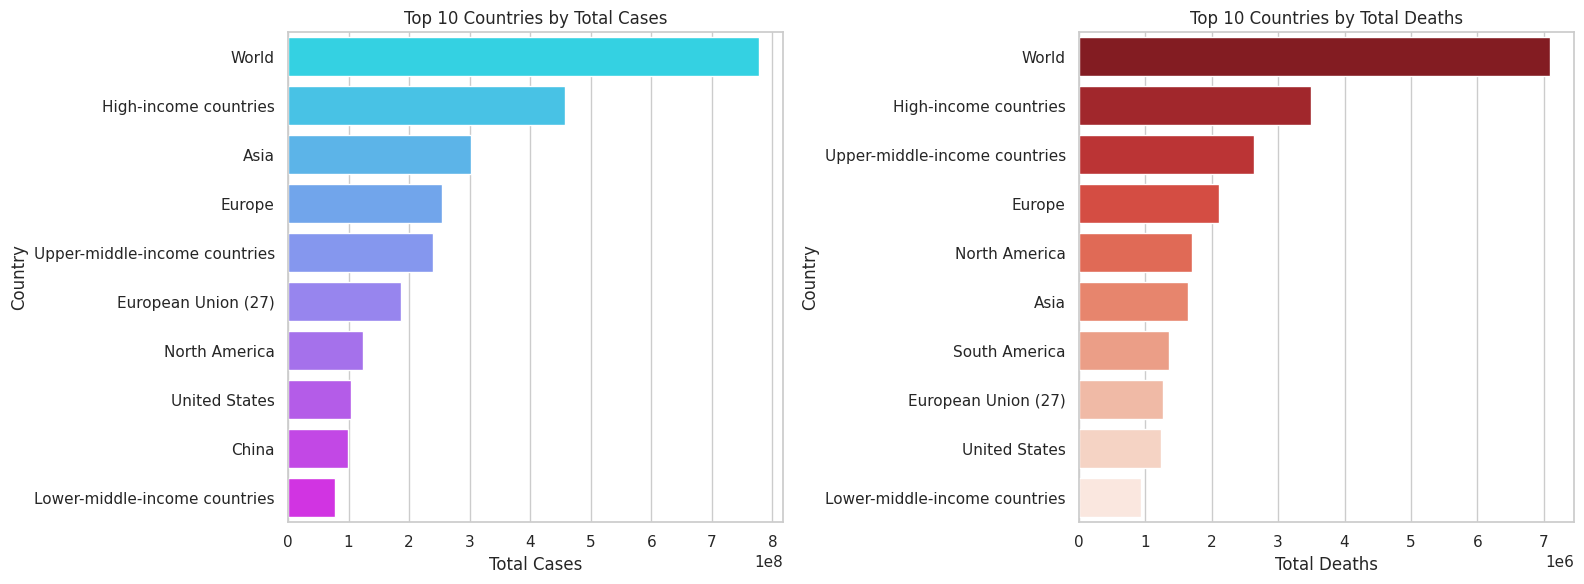

In [ ]:
# --- Top 10 countries by total cases ---
top_cases = latest.nlargest(10, "total_cases")[["country", "total_cases", "total_deaths", "population"]]
top_deaths = latest.nlargest(10, "total_deaths")[["country", "total_deaths"]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x="total_cases", y="country", data=top_cases, ax=axes[0], palette="cool")
axes[0].set_title("Top 10 Countries by Total Cases")
axes[0].set_xlabel("Total Cases")
axes[0].set_ylabel("Country")

sns.barplot(x="total_deaths", y="country", data=top_deaths, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top 10 Countries by Total Deaths")
axes[1].set_xlabel("Total Deaths")
axes[1].set_ylabel("Country")

plt.tight_layout()
plt.show()


/tmp/ipython-input-101711064.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




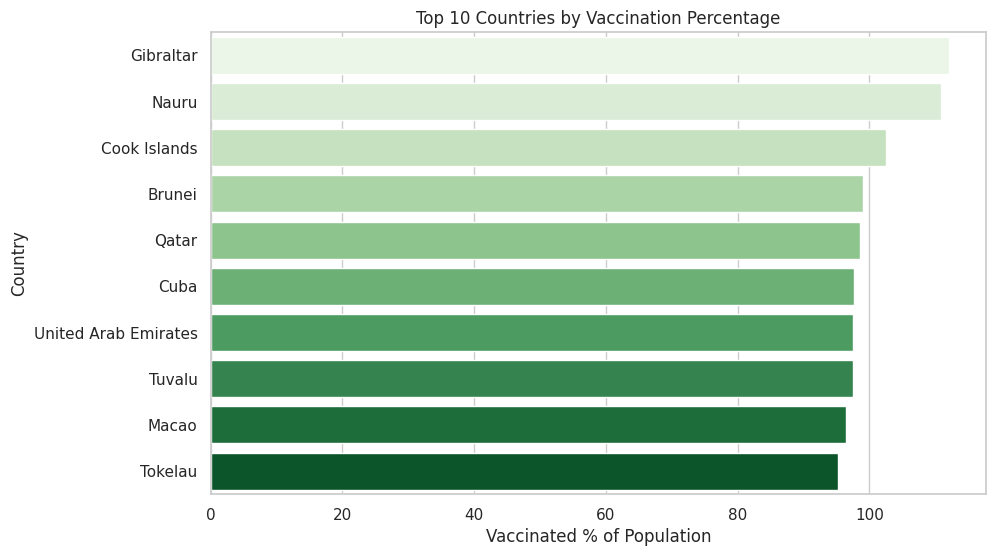

In [ ]:
if "vaccinated_pct" in latest.columns:
    top_vax = latest.nlargest(10, "vaccinated_pct")[["country", "vaccinated_pct"]]
    plt.figure(figsize=(10, 6))
    sns.barplot(x="vaccinated_pct", y="country", data=top_vax, palette="Greens")
    plt.title("Top 10 Countries by Vaccination Percentage")
    plt.xlabel("Vaccinated % of Population")
    plt.ylabel("Country")
    plt.show()
else:
    print("⚠️ Vaccination data not available in this dataset.")


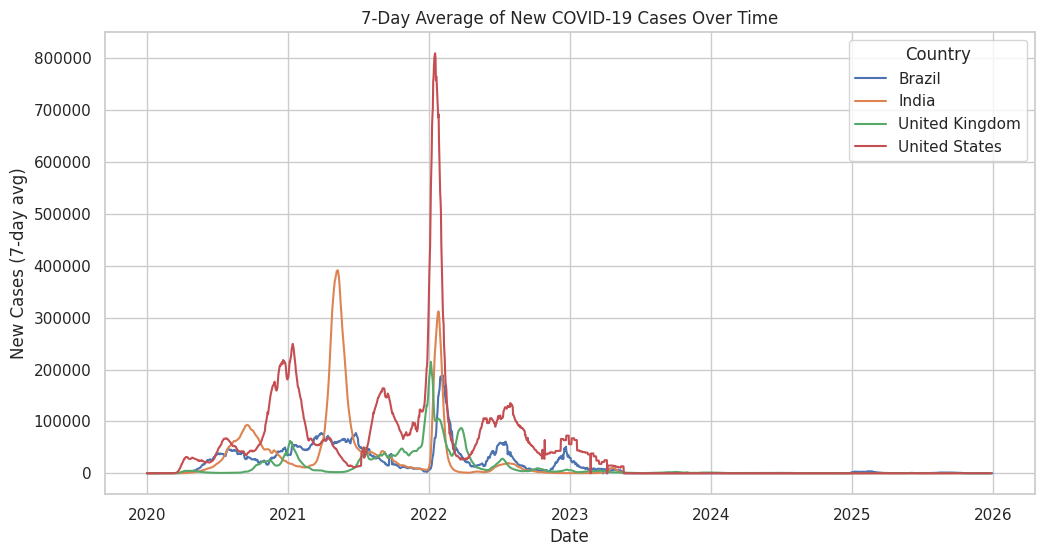

In [ ]:
# Select a few major countries
countries = ["India", "United States", "Brazil", "United Kingdom"]
subset = data[data["country"].isin(countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x="date", y="new_cases_7d_avg", hue="country")
plt.title("7-Day Average of New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases (7-day avg)")
plt.legend(title="Country")
plt.show()


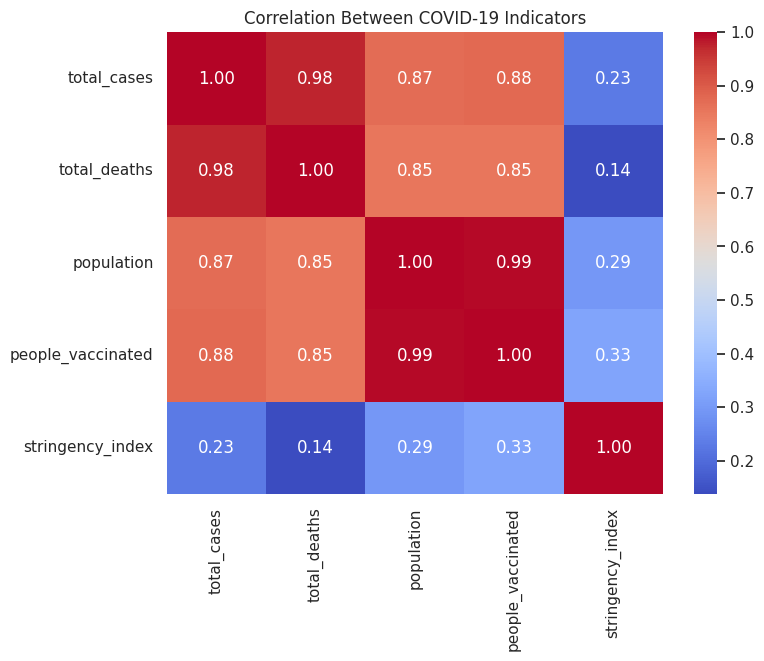

In [ ]:
corr_cols = [
    "total_cases", "total_deaths", "population",
    "people_vaccinated", "stringency_index"
]
available_corr = [c for c in corr_cols if c in latest.columns]

corr = latest[available_corr].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between COVID-19 Indicators")
plt.show()


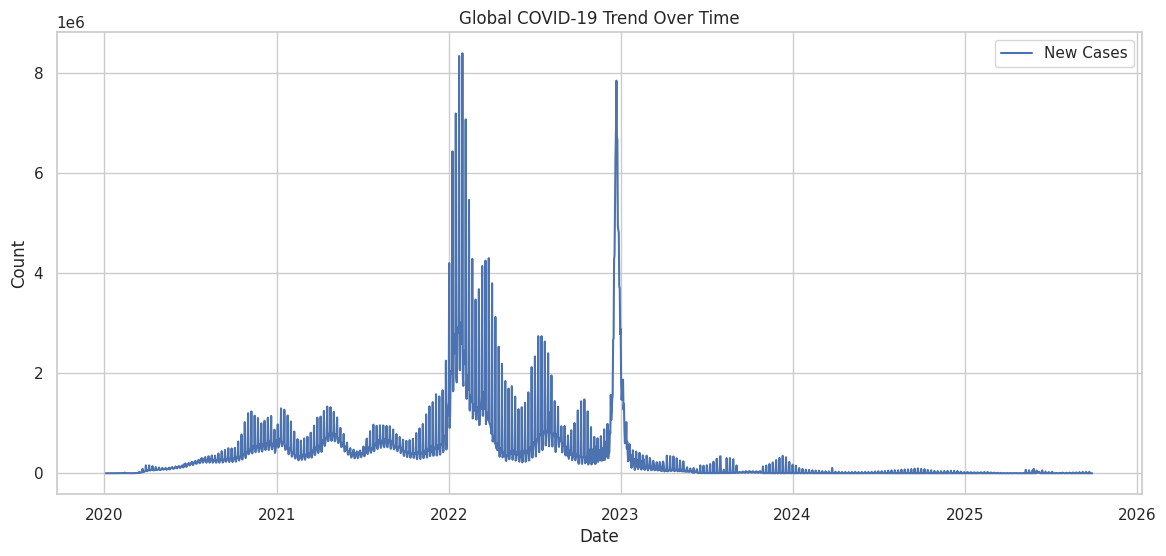

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5 — Global COVID trend over time
global_trend = df[df['country'] == 'World'][['date', 'new_cases']]

plt.figure(figsize=(14,6))
sns.lineplot(data=global_trend, x='date', y='new_cases', label='New Cases')
plt.title("Global COVID-19 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


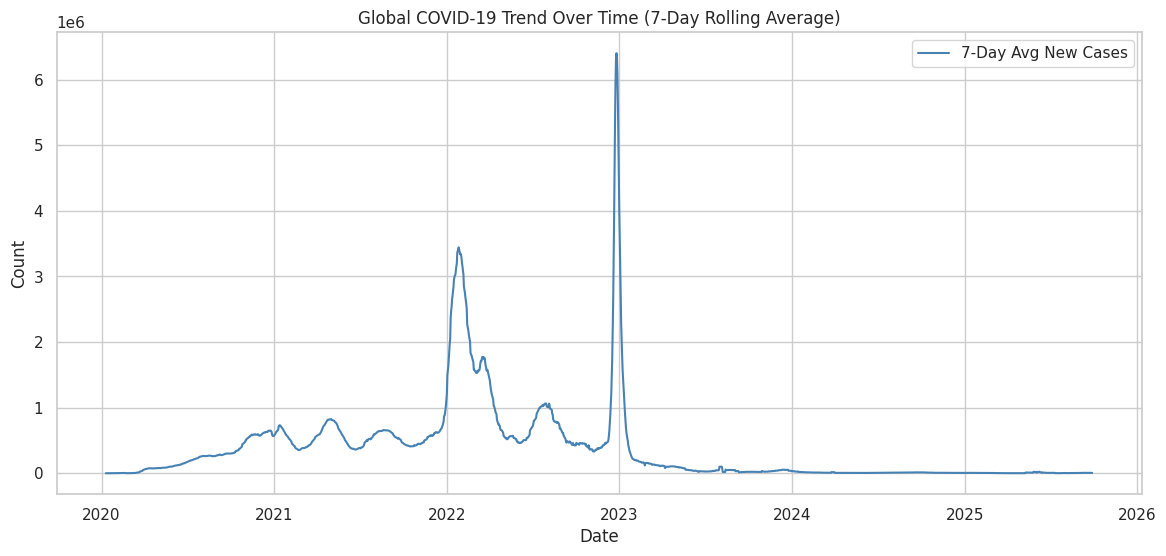

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5 — Global COVID trend over time (with 7-day rolling average)
global_trend = df[df['country'] == 'World'][['date', 'new_cases']].copy()

# Replace missing values with 0 for smooth rolling
global_trend['new_cases'] = global_trend['new_cases'].fillna(0)
global_trend['new_deaths'] = global_trend['new_deaths'].fillna(0)

# 7-day rolling average
global_trend['cases_7d_avg'] = global_trend['new_cases'].rolling(7).mean()
global_trend['deaths_7d_avg'] = global_trend['new_deaths'].rolling(7).mean()

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=global_trend, x='date', y='cases_7d_avg', label='7-Day Avg New Cases', color='steelblue')
plt.title("Global COVID-19 Trend Over Time (7-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


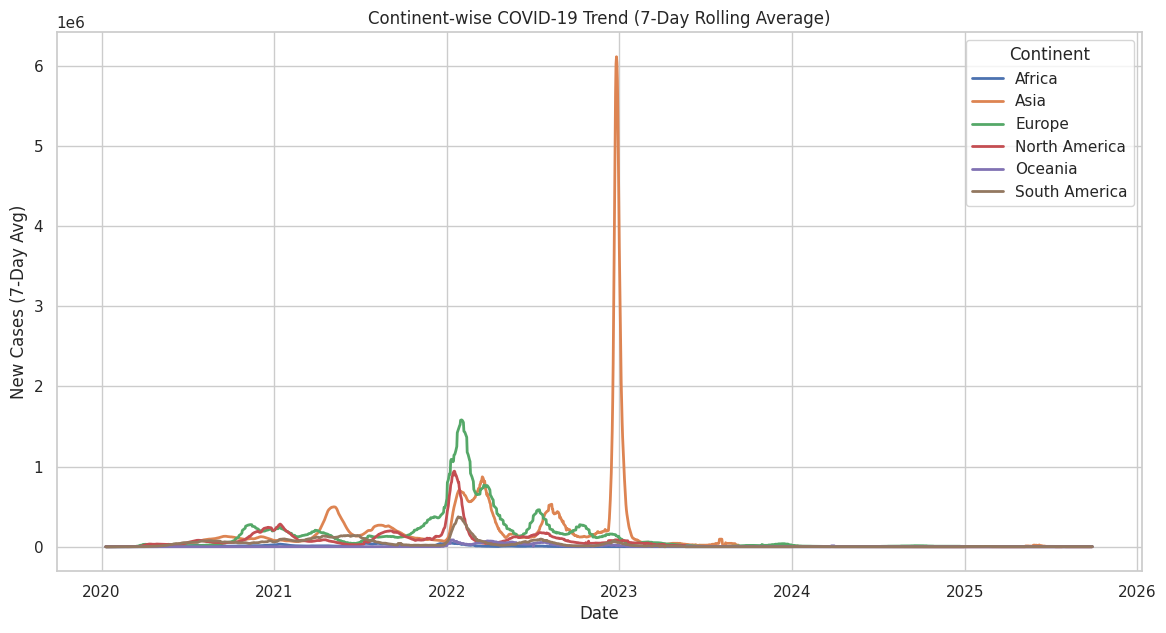

In [ ]:
# Step 6 — Continent-wise trend comparison (7-day rolling average)
continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

continent_trend = df[df['country'].isin(continents)][['country', 'date', 'new_cases']].copy()

# Handle missing values
continent_trend['new_cases'] = continent_trend['new_cases'].fillna(0)

# 7-day rolling average by continent
continent_trend['cases_7d_avg'] = (
    continent_trend.groupby('country')['new_cases']
    .transform(lambda x: x.rolling(7).mean())
)

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(data=continent_trend, x='date', y='cases_7d_avg', hue='country', linewidth=2)
plt.title("Continent-wise COVID-19 Trend (7-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("New Cases (7-Day Avg)")
plt.legend(title="Continent", loc='upper right')
plt.show()


In [ ]:
# Check available vaccination-related columns
[v for v in df.columns if 'vaccin' in v.lower()]


['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred']